### Kostnader på kort sikt
Vi skal skrive kostnadsfunksjonen på kort sikt som en funksjon av hvor mange enheter bedriften produserer. På kort sikt er det minst én produksjonsfaktor som er fast.

Basic Setup

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
from sympy.solvers import solve
from IPython.display import Markdown

from cycler import cycler
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import matplotlib.pylab as pylab


# custome plot style
params  = {
"lines.linewidth": 1.5,

"legend.fancybox": "true",

"axes.prop_cycle": cycler('color', ["#ffa822","#1ac0c6","#ff6150","#30B66A","#B06AFF","#FF21E1"]),
"axes.facecolor": "#2b2b2b",
"axes.axisbelow": "true",
"axes.grid": "true",
"axes.edgecolor": "#2b2b2b",
"axes.linewidth": 0.5,
"axes.labelpad": 0,

"patch.edgecolor": "#2b2b2b",
"patch.linewidth": 0.5,

"grid.linestyle": "--",
"grid.linewidth": 0.5,
"grid.color": "#b8aba7",

"xtick.major.size": 0,
"xtick.minor.size": 0,
"ytick.major.size": 0,
"ytick.minor.size": 0,

"font.family":"monospace",
"font.size":10.0,
"text.color": "#FFE9E3",
"axes.labelcolor": "#b8aba7",
"xtick.color": "#b8aba7",
"ytick.color": "#b8aba7",

"savefig.edgecolor": "#2b2b2b",
"savefig.facecolor": "#2b2b2b",

"figure.subplot.left": 0.08,
"figure.subplot.right": 0.95,
"figure.subplot.bottom": 0.09,
"figure.facecolor": "#2b2b2b"}

pylab.rcParams.update(params)
print("finish")

finish


In [17]:
# create graph function
def create_ax(x_label:str='x_label',y_label:str='y_label',lim:list=[(0,None),(0,None)],x_pos:str = 'right',y_pos:str='top'):
                fig, ax = plt.subplots(figsize=(10,5))
                ax.set_ylabel(y_label, loc=y_pos)
                ax.set_xlabel(x_label, loc=x_pos)
                ax.set(xlim=lim[0])
                ax.set(ylim=lim[1])
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

### Oppgave

En bedrift produserer goder med følgende produktfunksjon:

$$
x = f(N,K) = N^{0.5}K^{0.5}
$$

På kort sikt har bedriften tilgang til begrenset kapital $K_0 = 10$.
Prisen per enhet kapital er fast $r = 500$ NOK, 
mens én time med arbeidskraft koster $w = 350$ NOK. 
På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. 
Bedriften leier et bygg til produksjonen av produktet, og dette koster 10 000 NOK (faste kostnader).

a) Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: $C_8(x,K_0)$. 
Tegn denne funksjon i en figur med produksjon på den horisontale aksen. 
Tegn også kostnadsfunksjonen som oppstår når kapitalbeholdningen økes til $K_1=50$. Kommenter dine funn.

In [221]:
N,K,w,r,x = sp.symbols('N K w r x', positive=True, real=True)

def prod(N,K):
    prod = (N**0.5)*(K**0.5)
    return prod

def prod_cost(N,K,w,r,cons):
    vc = w*N
    fc = K*r+cons
    return vc+fc

cost = prod_cost(sp.solve(prod(N,K)-x,N)[0],K,350,500,10_000)
cost

500*K + 10000 + 350*x**2/K

In [294]:
def prod_cost_func(K,x,w,r,FC):
    n = (x**2)
    VC = (r*K)+(w*n)/K
    TC = VC+FC
    return {'TC':TC,'N':n,'VC':VC,'FC':FC}

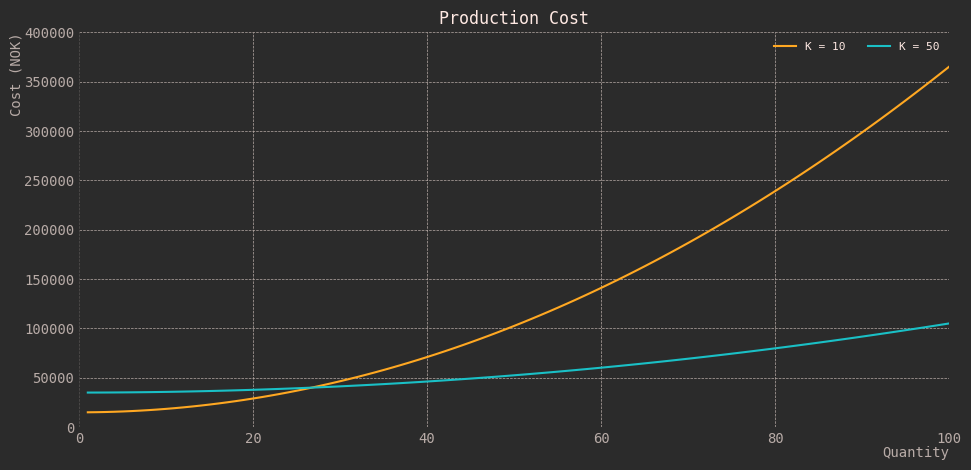

In [317]:
graph_Xmin = 0
graph_Xmax = 100
graph_Ymin = 0
graph_Ymax = 400000

x_num=np.linspace(1,100,100)

fig, ax = create_ax(x_label='Quantity',
                    y_label='Cost (NOK)',
                     lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)]
)

ax.plot(x_num,prod_cost_func(10,x_num,350,500,10_000)["TC"], label='K = 10')
ax.plot(x_num,prod_cost_func(50,x_num,350,500,10_000)["TC"], label='K = 50')

ax.set_title('Production Cost')
ax.legend(loc='best',frameon=False,ncol=2,prop={'size': 8});

b) I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt. Kommenter og forklar forholdet mellom total og variabel gjennomsnittskostnad og grensekostnaden.

In [315]:
def avarage_cost(TC,x):
    ATC = TC/x
    return ATC

def variblae_cost(AV,x):
    AVC = AV/x
    return AVC

def marginal_cost(K,N,w,x):
    MC = w*(N/K)**0.5
    return MC

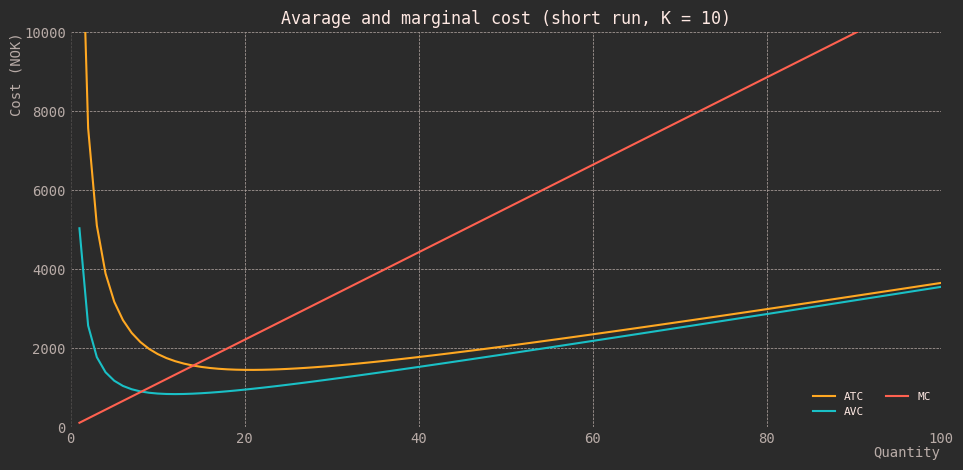

In [327]:
graph_Xmin = 0
graph_Xmax = 100
graph_Ymin = 0
graph_Ymax = 10000

x_num=np.linspace(1,100,100)

fig, ax = create_ax(x_label='Quantity',
                    y_label='Cost (NOK)',
                     lim=[(graph_Xmin,graph_Xmax),(graph_Ymin,graph_Ymax)]
)

pcf = prod_cost_func(10,x_num,350,500,10_000)
#ax.plot(x_num,prod_cost_func(10,x_num,350,500,10_000), label='K = 10')
#ax.plot(x_num,prod_cost_func(50,x_num,350,500,10_000), label='K = 50')
ax.plot(x_num,avarage_cost(pcf['TC'],x_num), label='ATC')
ax.plot(x_num,variblae_cost(pcf['VC'],x_num), label='AVC')
ax.plot(x_num,marginal_cost(10,pcf['N'],350,x_num), label='MC')


ax.set_title('Avarage and marginal cost (short run, K = 10)')
ax.legend(loc='best',frameon=False,ncol=2,prop={'size': 8});

Vi ser at ATC og AVC er similer siden hoved forskjellen mellom dem er FC, og jo mer du produserer jo nermere hverande kommer de til hverandre (der er på grund av MC). 
Vi kan også se at MC øker konstant med produksjon.

c) Hvilke skalaegenskaper viser denne produktfunksjon?

siden den dobbler seg så har den konstant returns, og på short run så vil kost gå opp med høyere productions mengde.

### Oppgave
Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)? Undersøk din løsning ved å kjøre samme analyse som ovenfor med en generell Cobb-Douglas produktfunksjon 
, hvor 
 er produksjonselastisitetene til arbeidskraft og kapital.

Fordi i en optimal løsning så vil kun faktorer bedriften kan manupulere være relevant.

In [358]:
N,K,X,lmda,w,r=sp.symbols('N K X \lambda, w, r', real=True, positive=True)

def x(N,K):
    x = (N**a)*(K**b)
    return x
x(N,K)

K**b*N**a

In [360]:
L=w*N + r*K-lmda*(x(N,K)-X)

dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)
display (foc_N)
display (foc_K)

Eq(-K**b*N**a*\lambda*a/N + w, 0)

Eq(r - K**b*N**a*\lambda*b/K, 0)

In [362]:
display (dL_N.args)
display (dL_K.args)

(w, -K**b*N**a*\lambda*a/N)

(r, -K**b*N**a*\lambda*b/K)

In [363]:
# da kan vi skrive den rel prisen på arbeidskraft (w/r) som
rel_w=(dL_N.args[0]/dL_K.args[0])

# og mtsb som
mtsb=(dL_N.args[1]/dL_K.args[1])

# sett disse lik som i likning (7)
optimal=sp.Eq(rel_w,mtsb)
display(optimal)

Eq(w/r, K*a/(N*b))